# **Wine Quality Prediction Model**
# Project Overview
Objective: The aim of this project is to develop a predictive model that estimates the quality of wine based on various physicochemical properties. The dataset used for this analysis is derived from the Wine Quality dataset, which contains features related to wine characteristics.

Dataset: The dataset consists of 13 features related to wine properties, with 178 entries. The target variable is a newly created quality column that categorizes wines based on certain criteria.

1.Importing the librares

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## 2.Data preperation
Load the wine dataset using sklearn.datasets.load_wine.

In [ ]:
# Load the Wine dataset from sklearn
from sklearn.datasets import load_wine
# Load the dataset into a variable
data = load_wine()
# Print the data
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# Create a Pandas DataFrame from the dataset.

In [ ]:
# Convert the loaded dataset into a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
# Check for missing values in the DataFrame
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


# Perform exploratory data analysis (EDA) using visualizations (e.g., heatmap, histograms, pair plots).

## HEATMAP

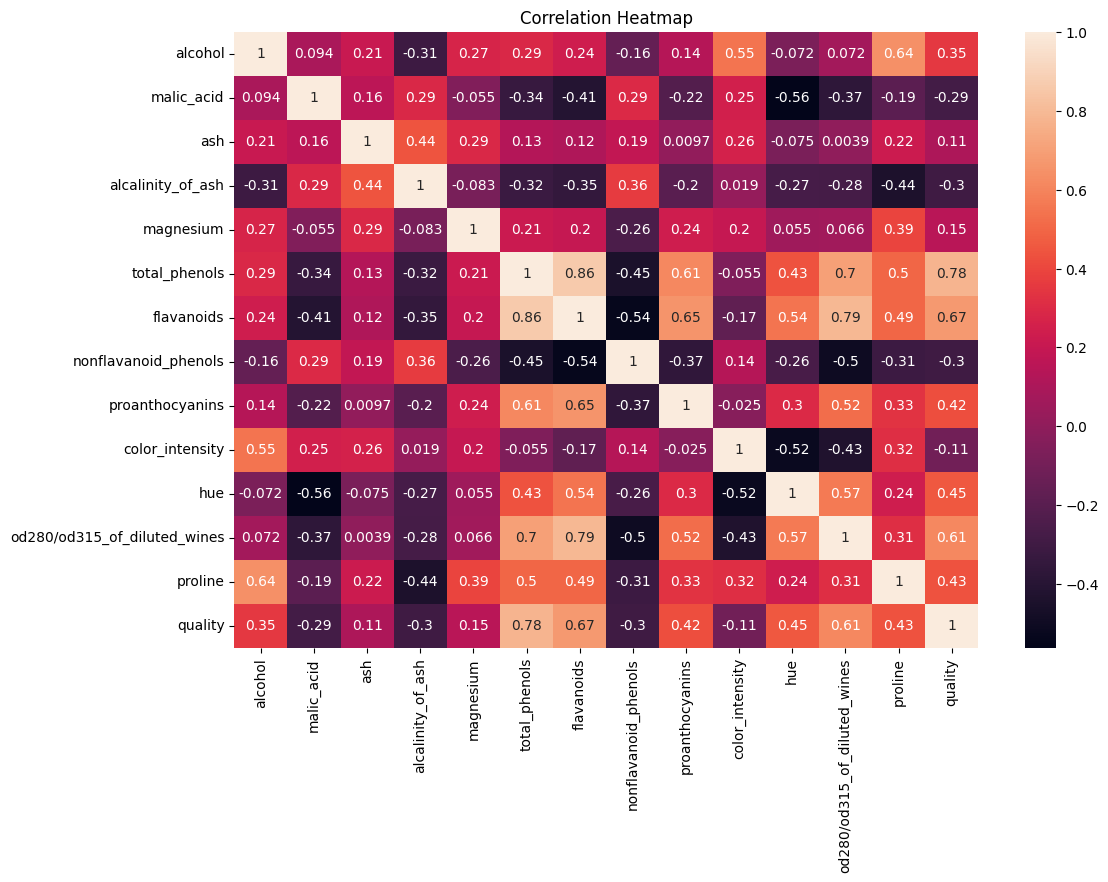

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

# SUBPLOT

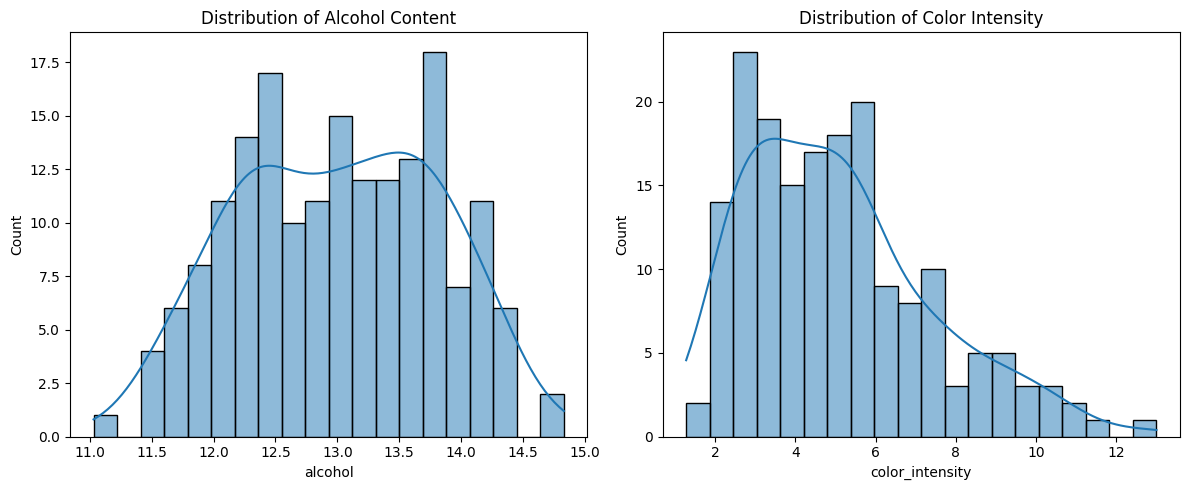

In [ ]:
# figure for visualizing histograms of two features
plt.figure(figsize=(12, 5))
# Create the first subplot for 'alcohol' feature
plt.subplot(1, 2, 1)
sns.histplot(df['alcohol'], bins=20, kde=True)
plt.title('Distribution of Alcohol Content')
# Create the second subplot for 'color_intensity' feature
plt.subplot(1, 2, 2)
sns.histplot(df['color_intensity'], bins=20, kde=True)
plt.title('Distribution of Color Intensity')
# Display the plots
plt.tight_layout()
plt.show()

# PAIR PLOT

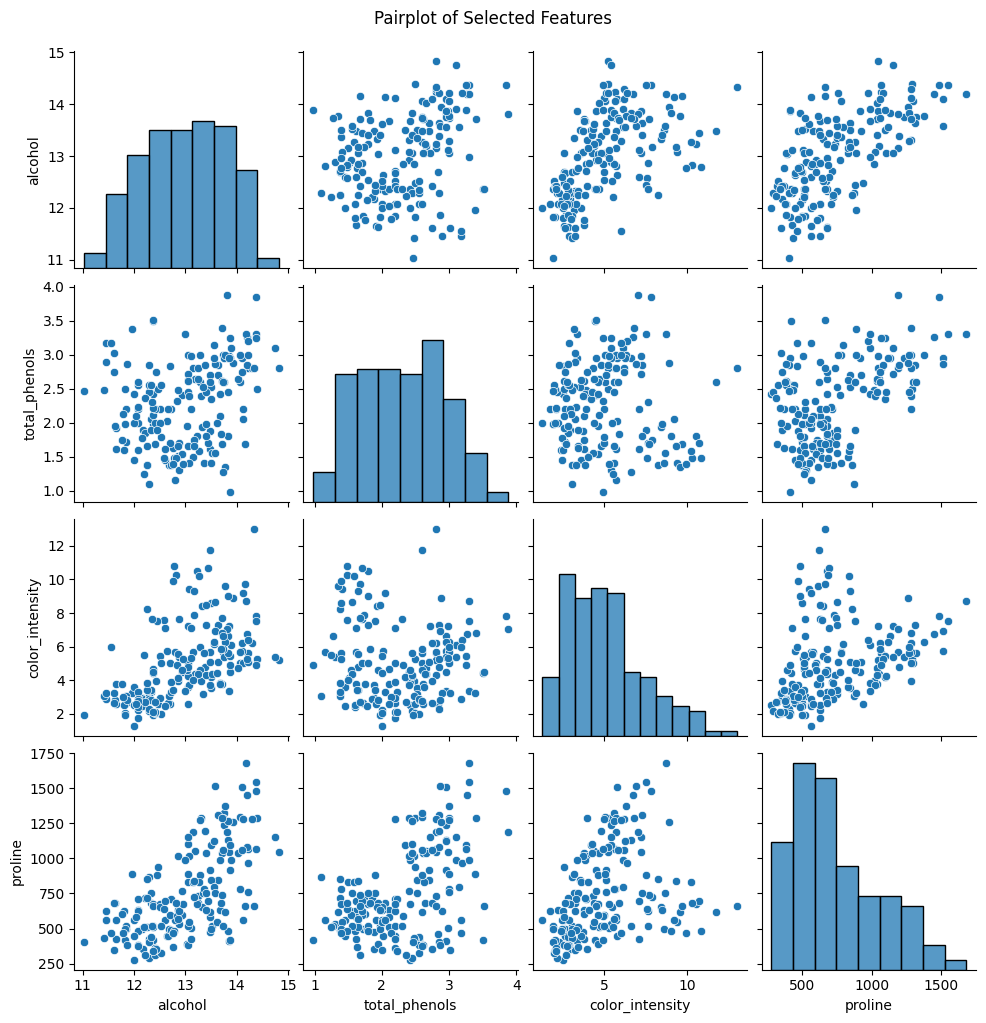

In [ ]:
# Create a pairplot to visualize relationships between selected features
sns.pairplot(df[['alcohol', 'total_phenols', 'color_intensity', 'proline']])
# Display the pairplot
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Create the 'quality' column based on alcohol and total phenols using the derive_quality function.

In [ ]:
# Create a 'quality' column using custom thresholds for alcohol and phenols
def derive_quality(row):
    if row['alcohol'] > 12 and row['total_phenols'] > 2:
        return 'High'
    elif row['alcohol'] > 10 and row['total_phenols'] > 1.5:
        return 'Medium'
    else:
        return 'Low'
# Apply the function to create the new quality column
df['quality'] = df.apply(derive_quality, axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,High
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,High
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,High
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,High
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,High


# Graph for the new added feature

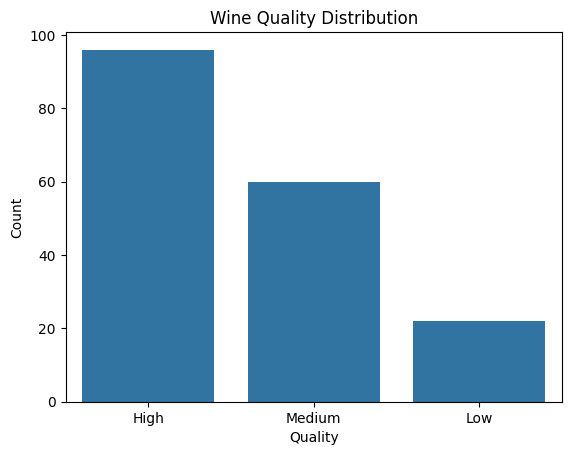

In [ ]:
# Visualize the distribution of wine quality using a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
# Display the plot
plt.show()

# Convert the 'quality' column to numerical values (0, 1, 2) for modeling.

In [ ]:
# Map the quality labels to numerical values for model training
quality_mapping = {'High': 2, 'Medium': 1, 'Low': 0}  # Define the mapping
# Apply the mapping to the 'quality' column
df['quality'] = df['quality'].map(quality_mapping)
# Display the updated DataFrame to verify the mapping
df.head()

In [ ]:
# Separate the features and the target variable
x = df.drop('quality', axis=1)
y = df['quality']

# 3. Model Training


# Scale the features using StandardScaler.

In [ ]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

# Split the data into training and testing sets using train_test_split.

In [ ]:
# Import train_test_split for splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Train a RandomForestClassifier model on the training data.

In [ ]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier
Random_forest_model=RandomForestClassifier()
# Fit the model to the training data
Random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

# 4.Mdoel Evaluation

Predict wine quality on the testing data.
# Evaluate model performance using metrics such as accuracy, confusion matrix, and classification report.

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report
y_pred=Random_forest_model.predict(x_test)
print(f"Confusion Matrix-\n{confusion_matrix(y_test,y_pred)}")
print(f"Accuracy ={accuracy_score(y_test,y_pred)}")
print(f"{classification_report(y_test,y_pred)}")

Confusion Matrix-
[[ 4  1  0]
 [ 0 10  0]
 [ 0  0 21]]
Accuracy =0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        21

    accuracy                           0.97        36
   macro avg       0.97      0.93      0.95        36
weighted avg       0.97      0.97      0.97        36



# Visualize the confusion matrix.

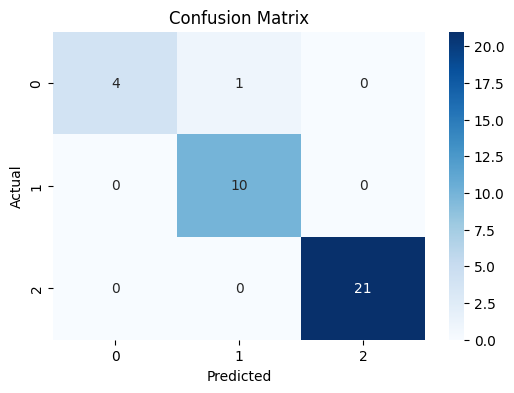

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5. Hyperparameter tuning
Perform hyperparameter tuning using GridSearchCV to find the best model parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=Random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}

Best Model Accuracy: 0.9444444444444444


# 6.Mdoel Comparison
Compare the performance of different classification models (Logistic Regression, KNN, SVM, etc.) using cross-validation and accuracy scores.
Select the best-performing model based on the comparison.

In [ ]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# List of models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42,verbose=-1),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
}
# Dictionary to store model results
results = {}
# Evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Print the result for the current model
    print(f"{name} Accuracy: {acc:.2f}")

# Compare models based on accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Comparison (Sorted by Accuracy):")
for name, acc in sorted_results:
    print(f"{name}: {acc:.2f}")

Logistic Regression Accuracy: 0.89
KNN Accuracy: 0.81
SVM Accuracy: 0.92
Decision Tree Accuracy: 0.97
Random Forest Accuracy: 0.97
Gradient Boosting Accuracy: 0.97
XGBoost Accuracy: 1.00
LightGBM Accuracy: 0.97
CatBoost Accuracy: 0.97

Model Comparison (Sorted by Accuracy):
XGBoost: 1.00
Decision Tree: 0.97
Random Forest: 0.97
Gradient Boosting: 0.97
LightGBM: 0.97
CatBoost: 0.97
SVM: 0.92
Logistic Regression: 0.89
KNN: 0.81
